# Frank Hertz Experiment (27/01/2025)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
# %matplotlib notebook

In [3]:
linfn = lambda x, a, b: a*x + b

In [4]:
def minfinder(x_array, y_array):
    for i in range(len(y_array)):
        if y_array[i] == y_array.min():
            return x_array[i], y_array[i]

In [5]:
df = pd.read_excel('T170.xlsx', sheet_name='Sheet1')
x1 = df['U in V'].to_numpy()
y1 = df['I in nA'].to_numpy()
df = pd.read_excel('T173.xlsx', sheet_name='Sheet1')
x2 = df['U in V'].to_numpy()
y2 = df['I in nA'].to_numpy()
df = pd.read_excel('T176.xlsx', sheet_name='Sheet1')
x3 = df['U in V'].to_numpy()
y3 = df['I in nA'].to_numpy()
df = pd.read_excel('T179.xlsx', sheet_name='Sheet1')
x4 = df['U in V'].to_numpy()
y4 = df['I in nA'].to_numpy()
df = pd.read_excel('T181.xlsx', sheet_name='Sheet1')
x5 = df['U in V'].to_numpy()
y5 = df['I in nA'].to_numpy()
df = pd.read_excel('T184.xlsx', sheet_name='Sheet1')
x6 = df['U in V'].to_numpy()
y6 = df['I in nA'].to_numpy()
df = pd.read_excel('T187.xlsx', sheet_name='Sheet1')
x7 = df['U in V'].to_numpy()
y7 = df['I in nA'].to_numpy()
df = pd.read_excel('T190.xlsx', sheet_name='Sheet1')
x8 = df['U in V'].to_numpy()
y8 = df['I in nA'].to_numpy()

In [6]:
L = 7 # in mm
T = np.array([170, 173, 176, 179, 181, 184, 187, 190]) + np.full(8, 273)
dEdn, errdEdn = [], []
Ea, errEa = [], []
lam, err_lam = [], []

### $T = 170 ^\circ C$

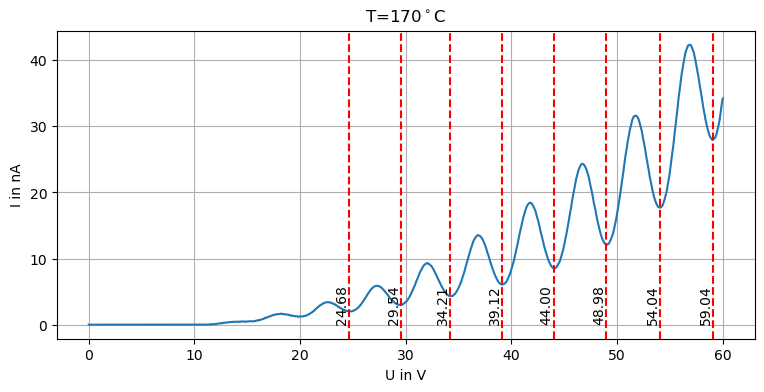

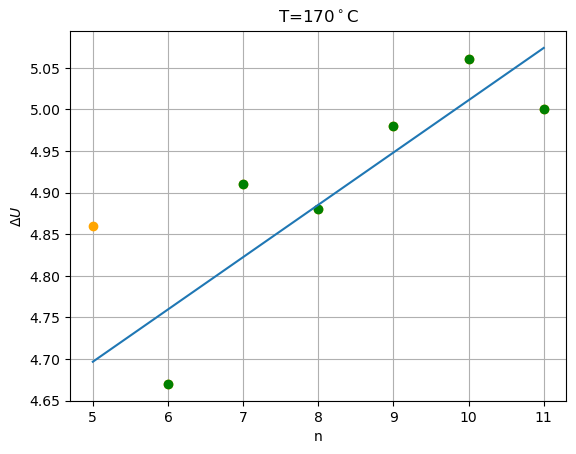

(None, None)

In [7]:
x, y = x1, y1
plt.figure(figsize=(9,4))
plt.plot(x, y)

inds = np.array([22.6, 27, 32, 37, 41.5, 46.6, 51.7, 56.7, 59.75])
minx, miny = [], []
for i in range(len(inds)-1):
    arr = np.where((x >= inds[i]) & (x <= inds[i+1]))[0]
    mins = minfinder(x[arr[0]:arr[-1]], y[arr[0]:arr[-1]])
    minx.append(mins[0])
    miny.append(mins[1])
minx, miny = np.array(minx), np.array(miny)

for i in minx:
    plt.axvline(i, color='r', linestyle='--')
    plt.text(i, 0, f'{i:.2f}', rotation=90, 
             verticalalignment='bottom', horizontalalignment='right')
plt.xlabel('U in V')
plt.ylabel('I in nA')
plt.title('T=170$^\circ$C')
plt.grid()
plt.savefig('T170_1.png', dpi=150)
plt.show()

delx = []
for i in range(len(minx)-1):
    delx.append(minx[i+1] - minx[i])
delx = np.array(delx)
n = np.arange(minx[0]//4.8, minx[0]//4.8+len(delx), dtype=int)
# n1, delx1 = n, delx
n1 = np.delete(n, [0])
delx1 = np.delete(delx, [0])
plt.plot(n, delx, 'o', color='orange')
plt.plot(n1, delx1, 'o', color='green')
popt, pcov = curve_fit(linfn, n1, delx1)
yfit = linfn(n, *popt)
plt.plot(n, yfit)
plt.xlabel('n')
plt.ylabel('$\Delta U$ ')
plt.title('T=170$^\circ$C')
plt.grid()
plt.savefig('T170_2.png', dpi=150)
plt.show()
En1, errEn1 = popt[0], np.sqrt(np.diag(pcov)[0])
Ea1 = linfn(-0.5, *popt)
errEai = []
for i in range(len(n1)):
    erri = (linfn(n1[i], *popt) - delx1[i])**2
    errEai.append(erri)
errEa1 = np.sqrt(np.sum(np.array(errEai)/(len(n1)-1)))
# err_int = np.sqrt(np.diag(pcov)[1])
# errEa1 = errEn1*0.5 + err_int
lam1 = (L/(2*Ea1))*En1
err_lam1 = lam1*(errEa1/Ea1 + errEn1/En1)
dEdn.append(En1), errdEdn.append(errEn1)
Ea.append(Ea1), errEa.append(errEa1)
lam.append(lam1), err_lam.append(err_lam1)

In [8]:
np.array([2,4,5])/2

array([1. , 2. , 2.5])

In [9]:
df = pd.DataFrame({
    'n':list(n) + [np.nan], 'U':minx, 'del U': list(delx) + [np.NaN]
    })
display(df)
# df.to_latex('T170.tex', index=False)

,n,U,del U
0,5.0,24.68,4.86
1,6.0,29.54,4.67
2,7.0,34.21,4.91
3,8.0,39.12,4.88
4,9.0,44.00,4.98
5,10.0,48.98,5.06
6,11.0,54.04,5.00
7,NaN,59.04,NaN


### $T = 173 ^\circ C$

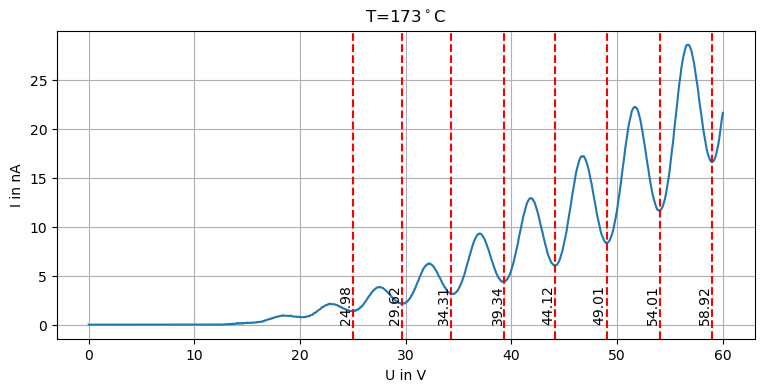

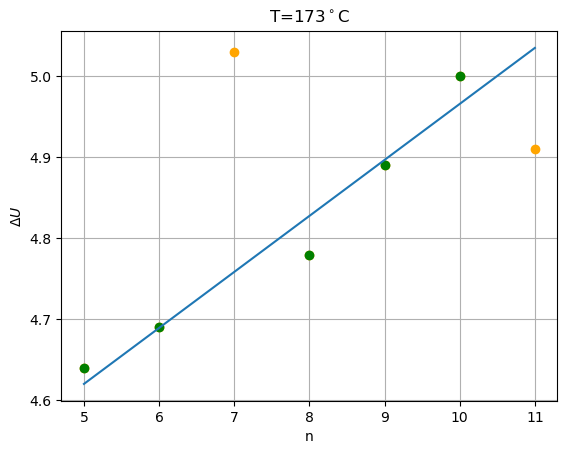

(None, None)

In [10]:
x, y = x2, y2
plt.figure(figsize=(9,4))
plt.plot(x, y)

inds = np.array([22.9, 27.3, 32, 37, 41.5, 46.6, 51.7, 56.7, 59.75])
minx, miny = [], []
for i in range(len(inds)-1):
    arr = np.where((x >= inds[i]) & (x <= inds[i+1]))[0]
    mins = minfinder(x[arr[0]:arr[-1]], y[arr[0]:arr[-1]])
    minx.append(mins[0])
    miny.append(mins[1])
minx, miny = np.array(minx), np.array(miny)

for i in minx:
    plt.axvline(i, color='r', linestyle='--')
    plt.text(i, 0, f'{i:.2f}', rotation=90, 
             verticalalignment='bottom', horizontalalignment='right')
plt.xlabel('U in V')
plt.ylabel('I in nA')
plt.title('T=173$^\circ$C')
plt.grid()
plt.savefig('T173_1.png', dpi=150)
plt.show()

delx = []
for i in range(len(minx)-1):
    delx.append(minx[i+1] - minx[i])
delx = np.array(delx)
n = np.arange(minx[0]//4.8, minx[0]//4.8+len(delx), dtype=int)
# n1, delx1 = n, delx
n1 = np.delete(n, [2,6])
delx1 = np.delete(delx, [2,6])
plt.plot(n, delx, 'o', color='orange')
plt.plot(n1, delx1, 'o', color='green')
popt, pcov = curve_fit(linfn, n1, delx1)
yfit = linfn(n, *popt)
plt.plot(n, yfit)
plt.xlabel('n')
plt.ylabel('$\Delta U$ ')
plt.title('T=173$^\circ$C')
plt.grid()
plt.savefig('T173_2.png', dpi=150)
plt.show()
En1, errEn1 = popt[0], np.sqrt(np.diag(pcov)[0])
Ea1 = linfn(-0.5, *popt)
errEai = []
for i in range(len(n1)):
    erri = (linfn(n1[i], *popt) - delx1[i])**2
    errEai.append(erri)
errEa1 = np.sqrt(np.sum(np.array(errEai)/(len(n1)-1)))
lam1 = (L/(2*Ea1))*En1
err_lam1 = lam1*(errEa1/Ea1 + errEn1/En1)
dEdn.append(En1), errdEdn.append(errEn1)
Ea.append(Ea1), errEa.append(errEa1)
lam.append(lam1), err_lam.append(err_lam1)

In [11]:
df = pd.DataFrame({
    'n':list(n) + [np.nan], 'U':minx, 'del U': list(delx) + [np.NaN]
    })
display(df)
# df.to_latex('T173.tex', index=False)

,n,U,del U
0,5.0,24.98,4.64
1,6.0,29.62,4.69
2,7.0,34.31,5.03
3,8.0,39.34,4.78
4,9.0,44.12,4.89
5,10.0,49.01,5.00
6,11.0,54.01,4.91
7,NaN,58.92,NaN


### $T = 176 ^\circ C$

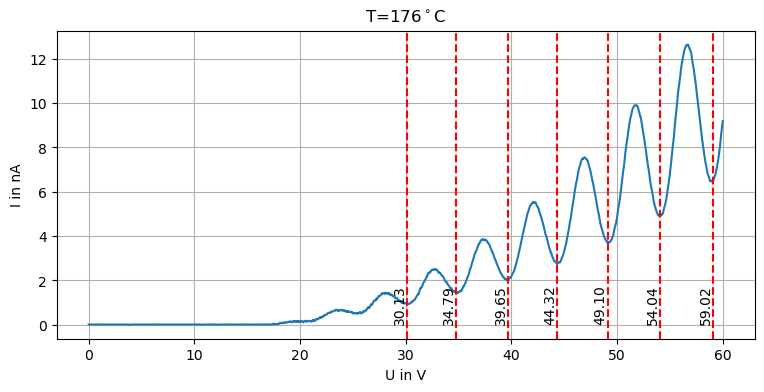

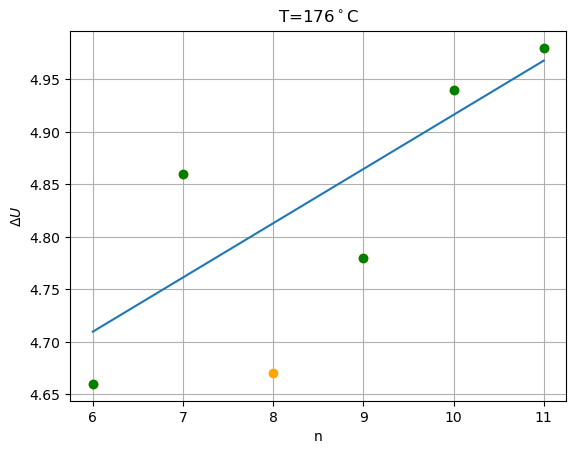

(None, None)

In [12]:
x, y = x3, y3
plt.figure(figsize=(9,4))
plt.plot(x, y)

inds = np.array([28, 32, 37, 41.5, 46.6, 51.7, 56.7, 59.75])
minx, miny = [], []
for i in range(len(inds)-1):
    arr = np.where((x >= inds[i]) & (x <= inds[i+1]))[0]
    mins = minfinder(x[arr[0]:arr[-1]], y[arr[0]:arr[-1]])
    minx.append(mins[0])
    miny.append(mins[1])
minx, miny = np.array(minx), np.array(miny)

for i in minx:
    plt.axvline(i, color='r', linestyle='--')
    plt.text(i, 0, f'{i:.2f}', rotation=90, 
             verticalalignment='bottom', horizontalalignment='right')
plt.xlabel('U in V')
plt.ylabel('I in nA')
plt.title('T=176$^\circ$C')
plt.grid()
plt.savefig('T176_1.png', dpi=150)
plt.show()

delx = []
for i in range(len(minx)-1):
    delx.append(minx[i+1] - minx[i])
delx = np.array(delx)
n = np.arange(minx[0]//4.8, minx[0]//4.8+len(delx), dtype=int)
# n1, delx1 = n, delx
n1 = np.delete(n, [2])
delx1 = np.delete(delx, [2])
plt.plot(n, delx, 'o', color='orange')
plt.plot(n1, delx1, 'o', color='green')
popt, pcov = curve_fit(linfn, n1, delx1)
yfit = linfn(n, *popt)
plt.plot(n, yfit)
plt.xlabel('n')
plt.ylabel('$\Delta U$ ')
plt.title('T=176$^\circ$C')
plt.grid()
plt.savefig('T176_2.png', dpi=150)
plt.show()
En1, errEn1 = popt[0], np.sqrt(np.diag(pcov)[0])
Ea1 = linfn(-0.5, *popt)
errEai = []
for i in range(len(n1)):
    erri = (linfn(n1[i], *popt) - delx1[i])**2
    errEai.append(erri)
errEa1 = np.sqrt(np.sum(np.array(errEai)/(len(n1)-1)))
lam1 = (L/(2*Ea1))*En1
err_lam1 = lam1*(errEa1/Ea1 + errEn1/En1)
dEdn.append(En1), errdEdn.append(errEn1)
Ea.append(Ea1), errEa.append(errEa1)
lam.append(lam1), err_lam.append(err_lam1)

In [13]:
df = pd.DataFrame({
    'n':list(n) + [np.nan], 'U':minx, 'del U': list(delx) + [np.NaN]
    })
display(df)
# df.to_latex('T176.tex', index=False)

,n,U,del U
0,6.0,30.13,4.66
1,7.0,34.79,4.86
2,8.0,39.65,4.67
3,9.0,44.32,4.78
4,10.0,49.10,4.94
5,11.0,54.04,4.98
6,NaN,59.02,NaN


### $T = 179 ^\circ C$

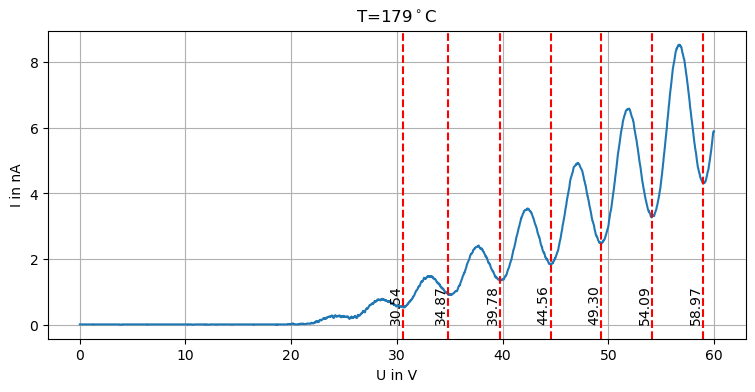

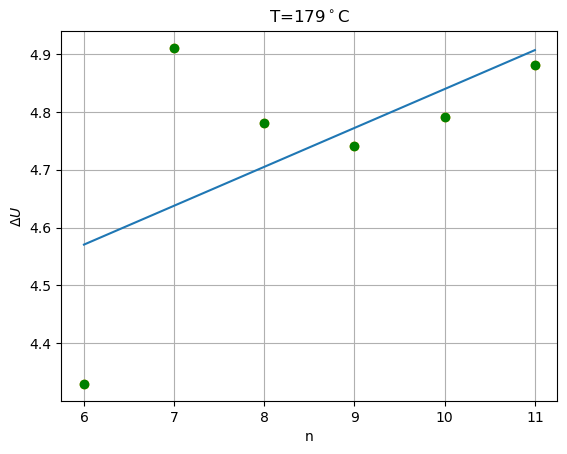

(None, None)

In [14]:
x, y = x4, y4
plt.figure(figsize=(9,4))
plt.plot(x, y)

inds = np.array([28.5, 33, 37.5, 41.5, 46.6, 51.7, 56.7, 59.75])
minx, miny = [], []
for i in range(len(inds)-1):
    arr = np.where((x >= inds[i]) & (x <= inds[i+1]))[0]
    mins = minfinder(x[arr[0]:arr[-1]], y[arr[0]:arr[-1]])
    minx.append(mins[0])
    miny.append(mins[1])
minx, miny = np.array(minx), np.array(miny)

for i in minx:
    plt.axvline(i, color='r', linestyle='--')
    plt.text(i, 0, f'{i:.2f}', rotation=90, 
             verticalalignment='bottom', horizontalalignment='right')
plt.xlabel('U in V')
plt.ylabel('I in nA')
plt.title('T=179$^\circ$C')
plt.grid()
plt.savefig('T179_1.png', dpi=150)
plt.show()

delx = []
for i in range(len(minx)-1):
    delx.append(minx[i+1] - minx[i])
delx = np.array(delx)
n = np.arange(minx[0]//4.8, minx[0]//4.8+len(delx), dtype=int)
n1, delx1 = n, delx
# n1 = np.delete(n, [1])
# delx1 = np.delete(delx, [1])
plt.plot(n, delx, 'o', color='orange')
plt.plot(n1, delx1, 'o', color='green')
popt, pcov = curve_fit(linfn, n1, delx1)
yfit = linfn(n, *popt)
plt.plot(n, yfit)
plt.xlabel('n')
plt.ylabel('$\Delta U$ ')
plt.title('T=179$^\circ$C')
plt.grid()
plt.savefig('T179_2.png', dpi=150)
plt.show()
En1, errEn1 = popt[0], np.sqrt(np.diag(pcov)[0])
Ea1 = linfn(-0.5, *popt)
errEai = []
for i in range(len(n1)):
    erri = (linfn(n1[i], *popt) - delx1[i])**2
    errEai.append(erri)
errEa1 = np.sqrt(np.sum(np.array(errEai)/(len(n1)-1)))
lam1 = (L/(2*Ea1))*En1
err_lam1 = lam1*(errEa1/Ea1 + errEn1/En1)
dEdn.append(En1), errdEdn.append(errEn1)
Ea.append(Ea1), errEa.append(errEa1)
lam.append(lam1), err_lam.append(err_lam1)

In [15]:
df = pd.DataFrame({
    'n':list(n) + [np.nan], 'U':minx, 'del U': list(delx) + [np.NaN]
    })
display(df)
# df.to_latex('T179.tex', index=False)

,n,U,del U
0,6.0,30.54,4.33
1,7.0,34.87,4.91
2,8.0,39.78,4.78
3,9.0,44.56,4.74
4,10.0,49.30,4.79
5,11.0,54.09,4.88
6,NaN,58.97,NaN


### $T = 181 ^\circ C$

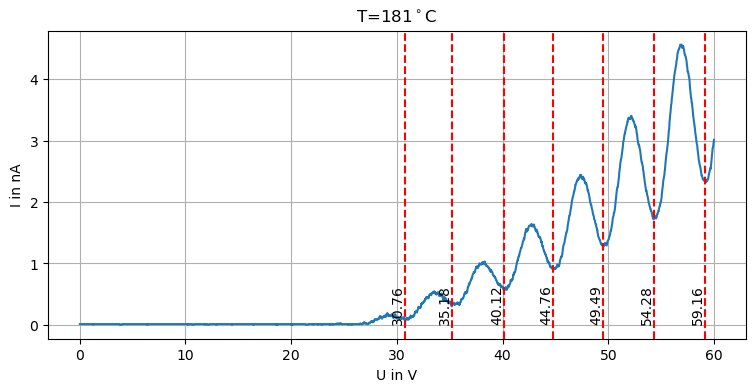

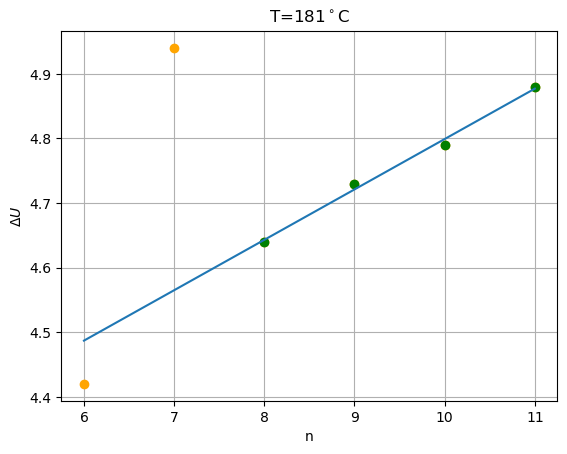

(None, None)

In [16]:
x, y = x5, y5
plt.figure(figsize=(9,4))
plt.plot(x, y)

inds = np.array([29, 33.5, 38, 42.5, 46.6, 51.7, 56.7, 59.75])
minx, miny = [], []
for i in range(len(inds)-1):
    arr = np.where((x >= inds[i]) & (x <= inds[i+1]))[0]
    mins = minfinder(x[arr[0]:arr[-1]], y[arr[0]:arr[-1]])
    minx.append(mins[0])
    miny.append(mins[1])
minx, miny = np.array(minx), np.array(miny)

for i in minx:
    plt.axvline(i, color='r', linestyle='--')
    plt.text(i, 0, f'{i:.2f}', rotation=90, 
             verticalalignment='bottom', horizontalalignment='right')
plt.xlabel('U in V')
plt.ylabel('I in nA')
plt.title('T=181$^\circ$C')
plt.grid()
plt.savefig('T181_1.png', dpi=150)
plt.show()

delx = []
for i in range(len(minx)-1):
    delx.append(minx[i+1] - minx[i])
delx = np.array(delx)
n = np.arange(minx[0]//4.8, minx[0]//4.8+len(delx), dtype=int)
# n1, delx1 = n, delx
n1 = np.delete(n, [0,1])
delx1 = np.delete(delx, [0,1])
plt.plot(n, delx, 'o', color='orange')
plt.plot(n1, delx1, 'o', color='green')
popt, pcov = curve_fit(linfn, n1, delx1)
yfit = linfn(n, *popt)
plt.plot(n, yfit)
plt.xlabel('n')
plt.ylabel('$\Delta U$ ')
plt.title('T=181$^\circ$C')
plt.grid()
plt.savefig('T181_2.png', dpi=150)
plt.show()
En1, errEn1 = popt[0], np.sqrt(np.diag(pcov)[0])
Ea1 = linfn(-0.5, *popt)
errEai = []
for i in range(len(n1)):
    erri = (linfn(n1[i], *popt) - delx1[i])**2
    errEai.append(erri)
errEa1 = np.sqrt(np.sum(np.array(errEai)/(len(n1)-1)))
lam1 = (L/(2*Ea1))*En1
err_lam1 = lam1*(errEa1/Ea1 + errEn1/En1)
dEdn.append(En1), errdEdn.append(errEn1)
Ea.append(Ea1), errEa.append(errEa1)
lam.append(lam1), err_lam.append(err_lam1)

In [17]:
df = pd.DataFrame({
    'n':list(n) + [np.nan], 'U':minx, 'del U': list(delx) + [np.NaN]
    })
display(df)
# df.to_latex('T181.tex', index=False)

,n,U,del U
0,6.0,30.76,4.42
1,7.0,35.18,4.94
2,8.0,40.12,4.64
3,9.0,44.76,4.73
4,10.0,49.49,4.79
5,11.0,54.28,4.88
6,NaN,59.16,NaN


### $T = 184 ^\circ C$

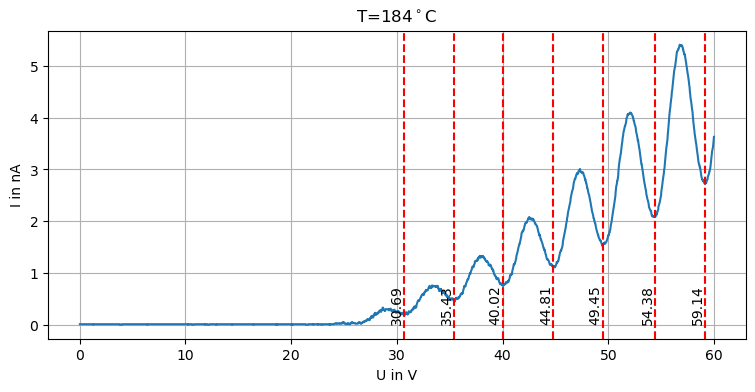

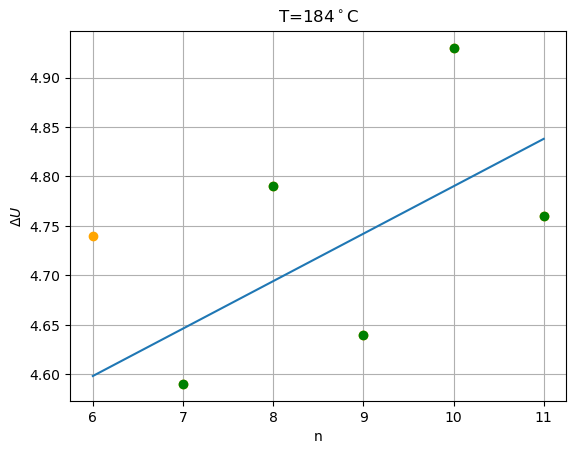

(None, None)

In [18]:
x, y = x6, y6
plt.figure(figsize=(9,4))
plt.plot(x, y)

inds = np.array([29, 33, 37, 41.5, 46.6, 51.7, 56.7, 59.75])
minx, miny = [], []
for i in range(len(inds)-1):
    arr = np.where((x >= inds[i]) & (x <= inds[i+1]))[0]
    mins = minfinder(x[arr[0]:arr[-1]], y[arr[0]:arr[-1]])
    minx.append(mins[0])
    miny.append(mins[1])
minx, miny = np.array(minx), np.array(miny)

for i in minx:
    plt.axvline(i, color='r', linestyle='--')
    plt.text(i, 0, f'{i:.2f}', rotation=90, 
             verticalalignment='bottom', horizontalalignment='right')
plt.xlabel('U in V')
plt.ylabel('I in nA')
plt.title('T=184$^\circ$C')
plt.grid()
plt.savefig('T184_1.png', dpi=150)
plt.show()

delx = []
for i in range(len(minx)-1):
    delx.append(minx[i+1] - minx[i])
delx = np.array(delx)
n = np.arange(minx[0]//4.8, minx[0]//4.8+len(delx))
# n1, delx1 = n, delx
n1 = np.delete(n, [0])
delx1 = np.delete(delx, [0])
plt.plot(n, delx, 'o', color='orange')
plt.plot(n1, delx1, 'o', color='green')
popt, pcov = curve_fit(linfn, n1, delx1)
yfit = linfn(n, *popt)
plt.plot(n, yfit)
plt.xlabel('n')
plt.ylabel('$\Delta U$ ')
plt.title('T=184$^\circ$C')
plt.grid()
plt.savefig('T184_2.png', dpi=150)
plt.show()
En1, errEn1 = popt[0], np.sqrt(np.diag(pcov)[0])
Ea1 = linfn(-0.5, *popt)
errEai = []
for i in range(len(n1)):
    erri = (linfn(n1[i], *popt) - delx1[i])**2
    errEai.append(erri)
errEa1 = np.sqrt(np.sum(np.array(errEai)/(len(n1)-1)))
lam1 = (L/(2*Ea1))*En1
err_lam1 = lam1*(errEa1/Ea1 + errEn1/En1)
dEdn.append(En1), errdEdn.append(errEn1)
Ea.append(Ea1), errEa.append(errEa1)
lam.append(lam1), err_lam.append(err_lam1)

In [19]:
df = pd.DataFrame({
    'n':list(n) + [np.nan], 'U':minx, 'del U': list(delx) + [np.NaN]
    })
display(df)
# df.to_latex('T184.tex', index=False)

,n,U,del U
0,6.0,30.69,4.74
1,7.0,35.43,4.59
2,8.0,40.02,4.79
3,9.0,44.81,4.64
4,10.0,49.45,4.93
5,11.0,54.38,4.76
6,NaN,59.14,NaN


### $T = 187 ^\circ C$

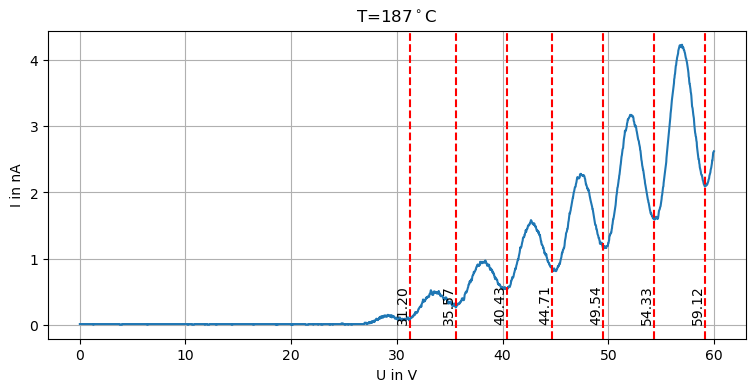

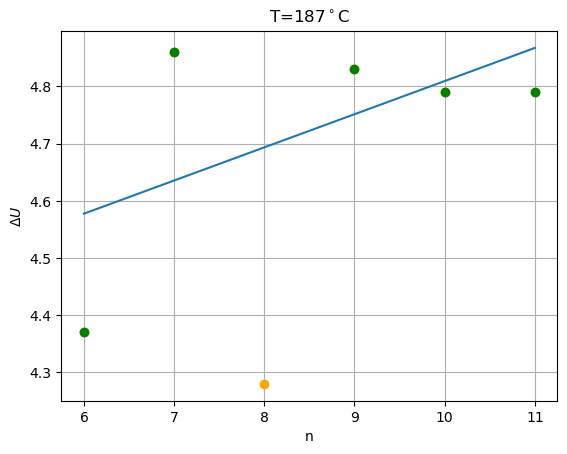

(None, None)

In [20]:
x, y = x7, y7
plt.figure(figsize=(9,4))
plt.plot(x, y)

inds = np.array([29.2, 33.5, 38, 42, 47, 51.7, 56.7, 59.75])
minx, miny = [], []
for i in range(len(inds)-1):
    arr = np.where((x >= inds[i]) & (x <= inds[i+1]))[0]
    mins = minfinder(x[arr[0]:arr[-1]], y[arr[0]:arr[-1]])
    minx.append(mins[0])
    miny.append(mins[1])
minx, miny = np.array(minx), np.array(miny)

for i in minx:
    plt.axvline(i, color='r', linestyle='--')
    plt.text(i, 0, f'{i:.2f}', rotation=90, 
             verticalalignment='bottom', horizontalalignment='right')
plt.xlabel('U in V')
plt.ylabel('I in nA')
plt.title('T=187$^\circ$C')
plt.grid()
plt.savefig('T187_1.png', dpi=150)
plt.show()

delx = []
for i in range(len(minx)-1):
    delx.append(minx[i+1] - minx[i])
delx = np.array(delx)
n = np.arange(minx[0]//4.8, minx[0]//4.8+len(delx))
# n1, delx1 = n, delx
n1 = np.delete(n, [2])
delx1 = np.delete(delx, [2])
plt.plot(n, delx, 'o', color='orange')
plt.plot(n1, delx1, 'o', color='green')
popt, pcov = curve_fit(linfn, n1, delx1)
yfit = linfn(n, *popt)
plt.plot(n, yfit)
plt.xlabel('n')
plt.ylabel('$\Delta U$ ')
plt.title('T=187$^\circ$C')
plt.grid()
plt.savefig('T187_2.png', dpi=150)
plt.show()
En1, errEn1 = popt[0], np.sqrt(np.diag(pcov)[0])
Ea1 = linfn(-0.5, *popt)
errEai = []
for i in range(len(n1)):
    erri = (linfn(n1[i], *popt) - delx1[i])**2
    errEai.append(erri)
errEa1 = np.sqrt(np.sum(np.array(errEai)/(len(n1)-1)))
lam1 = (L/(2*Ea1))*En1
err_lam1 = lam1*(errEa1/Ea1 + errEn1/En1)
dEdn.append(En1), errdEdn.append(errEn1)
Ea.append(Ea1), errEa.append(errEa1)
lam.append(lam1), err_lam.append(err_lam1)

In [21]:
df = pd.DataFrame({
    'n':list(n) + [np.nan], 'U':minx, 'del U': list(delx) + [np.NaN]
    })
display(df)
# df.to_latex('T187.tex', index=False)

,n,U,del U
0,6.0,31.20,4.37
1,7.0,35.57,4.86
2,8.0,40.43,4.28
3,9.0,44.71,4.83
4,10.0,49.54,4.79
5,11.0,54.33,4.79
6,NaN,59.12,NaN


### $T = 190 ^\circ C$

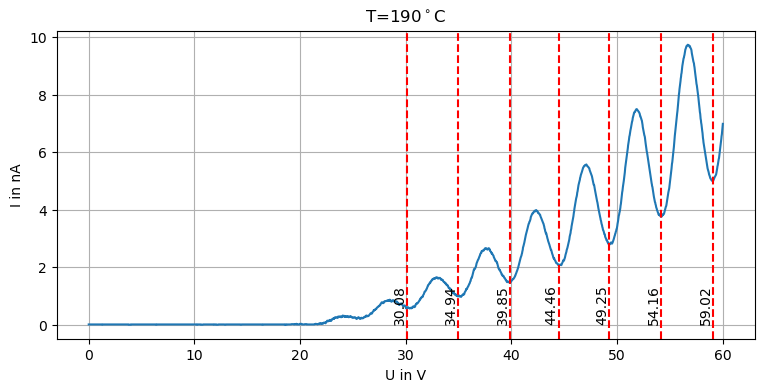

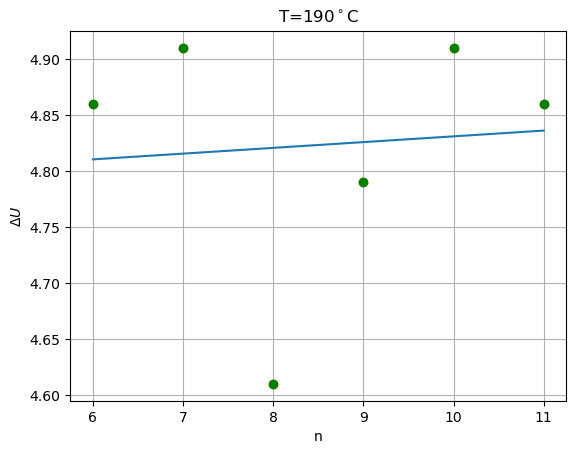

(None, None)

In [22]:
x, y = x8, y8
plt.figure(figsize=(9,4))
plt.plot(x, y)

inds = np.array([29.2, 33.5, 38, 42, 47, 51.7, 56.7, 59.75])
minx, miny = [], []
for i in range(len(inds)-1):
    arr = np.where((x >= inds[i]) & (x <= inds[i+1]))[0]
    mins = minfinder(x[arr[0]:arr[-1]], y[arr[0]:arr[-1]])
    minx.append(mins[0])
    miny.append(mins[1])
minx, miny = np.array(minx), np.array(miny)

for i in minx:
    plt.axvline(i, color='r', linestyle='--')
    plt.text(i, 0, f'{i:.2f}', rotation=90, 
             verticalalignment='bottom', horizontalalignment='right')
plt.xlabel('U in V')
plt.ylabel('I in nA')
plt.title('T=190$^\circ$C')
plt.grid()
plt.savefig('T190_1.png', dpi=150)
plt.show()

delx = []
for i in range(len(minx)-1):
    delx.append(minx[i+1] - minx[i])
delx = np.array(delx)
n = np.arange(minx[0]//4.8, minx[0]//4.8+len(delx), dtype=int)
n1, delx1 = n, delx
# n1 = np.delete(n, [0])
# delx1 = np.delete(delx, [0])
plt.plot(n, delx, 'o', color='orange')
plt.plot(n1, delx1, 'o', color='green')
popt, pcov = curve_fit(linfn, n1, delx1)
yfit = linfn(n, *popt)
plt.plot(n, yfit)
plt.xlabel('n')
plt.ylabel('$\Delta U$ ')
plt.title('T=190$^\circ$C')
plt.grid()
plt.savefig('T190_2.png', dpi=150)
plt.show()
En1, errEn1 = popt[0], np.sqrt(np.diag(pcov)[0])
Ea1 = linfn(-0.5, *popt)
errEai = []
for i in range(len(n1)):
    erri = (linfn(n1[i], *popt) - delx1[i])**2
    errEai.append(erri)
errEa1 = np.sqrt(np.sum(np.array(errEai)/(len(n1)-1)))
lam1 = (L/(2*Ea1))*En1
err_lam1 = lam1*(errEa1/Ea1 + errEn1/En1)
dEdn.append(En1), errdEdn.append(errEn1)
Ea.append(Ea1), errEa.append(errEa1)
lam.append(lam1), err_lam.append(err_lam1)

In [23]:
df = pd.DataFrame({
    'n':list(n) + [np.nan], 'U':minx, 'del U': list(delx) + [np.NaN]
    })
display(df)
# df.to_latex('T190.tex', index=False)

,n,U,del U
0,6.0,30.08,4.86
1,7.0,34.94,4.91
2,8.0,39.85,4.61
3,9.0,44.46,4.79
4,10.0,49.25,4.91
5,11.0,54.16,4.86
6,NaN,59.02,NaN


## $\lambda$ vs $T$

In [24]:
dEdn_arr = np.array(dEdn)
Ea_arr = np.array(Ea)
lam_arr = np.array(lam)
df = pd.DataFrame({
    'T':T, 'dE/dn':dEdn_arr, 'dE/dn err':errdEdn, 'Ea':Ea_arr, 'Ea err': errEa,
      'lambda':lam_arr, 'lam err': err_lam
    })
display(df)
df.to_latex('lam_vs_T.tex', index=False)

,T,dE/dn,dE/dn err,Ea,Ea err,lambda,lam err
0,443,0.062857,0.018743,4.350952,0.070129,0.050564,0.015892
1,446,0.069186,0.008659,4.239593,0.031099,0.057117,0.007567
2,449,0.051628,0.019724,4.374186,0.070842,0.041310,0.016451
3,452,0.067143,0.045006,4.134048,0.168399,0.056845,0.040419
4,454,0.078000,0.004243,3.980000,0.007746,0.068593,0.003864
5,457,0.048000,0.040183,4.286000,0.110045,0.039197,0.033820
6,460,0.057907,0.045325,4.201047,0.162792,0.048244,0.039631
7,463,0.005143,0.030207,4.777048,0.113023,0.003768,0.022221


C:\Users\suman\AppData\Local\Temp\ipykernel_5056\3613556411.py:9: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df.to_latex('lam_vs_T.tex', index=False)


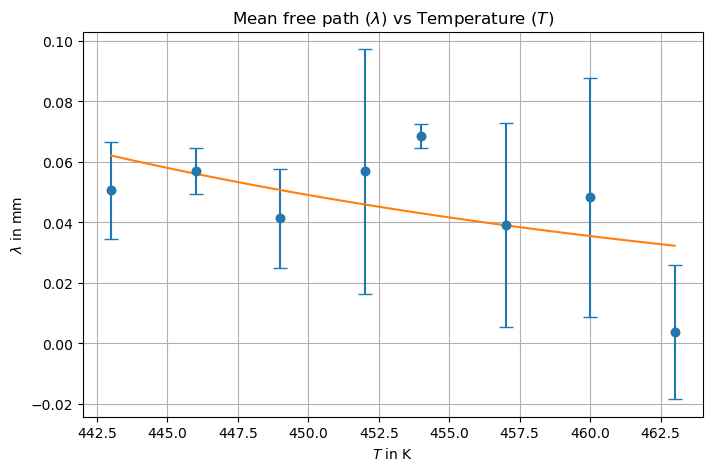

Fitting parameter, A: 0.11641531791968104, error: 0.014827079471760167.


In [25]:
plt.figure(figsize=(8,5))
plt.plot(T, lam_arr, 'o', color='orange')
T_p, lam_p, errlam_p = T, lam_arr, err_lam
# T_p = np.delete(T, [7])
# lam_p, errlam_p = np.delete(lam_arr, [7]), np.delete(err_lam, [7])
plt.errorbar(T_p, lam_p, yerr=errlam_p, fmt='o', capsize=5, label='lam vs T')
fn_lamT = lambda T, A: A*T/(8.7*10**(9-3110/T))
popt, pcov = curve_fit(fn_lamT, T_p, lam_p, p0=[0.05])
x1 = np.linspace(T_p[0], T_p[-1], 100)
y1 = fn_lamT(x1, *popt)
plt.plot(x1, y1)
plt.title('Mean free path ($\lambda$) vs Temperature ($T$)')
plt.xlabel('$T$ in K')
plt.ylabel('$\lambda$ in mm')
plt.grid()
plt.savefig('lam_vs_T.png', dpi=150)
plt.show()
Afit = popt[0]
Aerr = np.sqrt(np.diag(pcov)[0])
print(f'Fitting parameter, A: {Afit}, error: {Aerr}.')

In [26]:
kB = 1.38e-23
sig = kB*1e3/Afit
sig_err = sig*(Aerr/Afit)
print(f'Cross section: {sig} m^2, error: {sig_err} m^2.')

Cross section: 1.1854110134820142e-19 m^2, error: 1.5097827002219763e-20 m^2.


In [27]:
print(f'E_a = {np.mean(Ea_arr)} eV, error = {np.mean(errEa)} eV.')

E_a = 4.292859151071016 eV, error = 0.09175933121612231 eV.
